# Generating coeval boxes and lightcones

The majority of the functions for generating these two objects are the same, with the exception of the lightcone class having the extra attribute Lightconer (the lightconer object from 21cmFAST, required for plotting of the lightcone) and the plot_lightcone function; and the lightcone having a central redshift and redshift range, as opposed to the single input redshift for the box.  
Here, we demonstrate with a lightcone.

In [75]:
from postEoR import generation as gen

In [125]:
import postEoR.tools as tools
import matplotlib.pyplot as plt
import importlib
importlib.reload(tools)

sph_prof = tools.create_spherical_profile(1e11, 4, 50, 250)

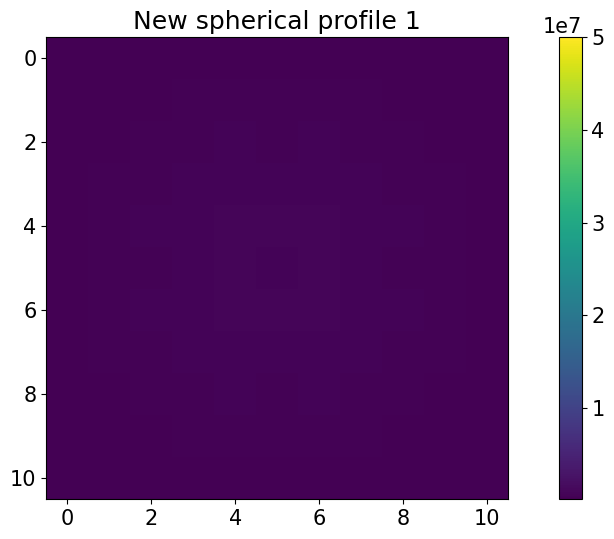

In [131]:
plt.imshow(sph_prof[1, :, :], vmax=5e7)
plt.title("New spherical profile 1")
plt.colorbar()

We can specify the desired redshift (+ redshift range for the cone), the physical dimensions and number of cells, and the overdensity limit for inclusion of cells in halos.

In [3]:
central_redshift = 4
redshift_range = 0.4
no_of_cells = 200
phys_length = 400
overdens_cap = 0

In [4]:
cone = gen.generate_cone(
    z_centr=central_redshift, 
    delta_z=redshift_range, 
    HII_dim=no_of_cells, 
    box_len=phys_length, 
    overdens_cap=overdens_cap,
)

/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/py21cmfast/inputs.py:519: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(


abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve


We can plot colormaps, power spectra, halo mass functions etc. from the object itself.

In [105]:
box = gen.generate_box(4, 250, 50, overdens_cap=1.686, connectivity=3)

/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/py21cmfast/inputs.py:519: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(


54547
new!
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve


/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/hmf/density_field/transfer_models.py:233: UserWarning: 'extrapolate_with_eh' was not set. Defaulting to True, which is different behaviour than versions <=3.4.4. This warning may be removed in v4.0. Silence it by setting extrapolate_with_eh explicitly.
  warnings.warn(


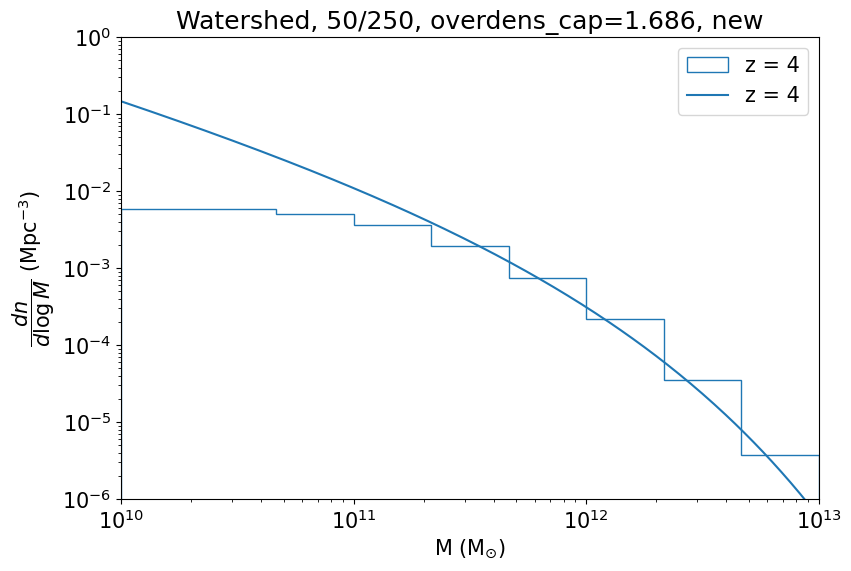

In [6]:
import matplotlib.pyplot as plt

box.gen_hmf(title="Watershed, 50/250, overdens_cap=1.686, new", Mmax=13, Mmin=10)
plt.ylim(1e-6, 1e-0)
plt.xlim(1e10, 1e13)
plt.show()

# Power spectra and bias

We can also calculate and plot the power spectra of the object directly. <br>
The bias may also be calculated, and plot separately using matplotlib.

Generated bins.
Generated bins.
Using input bins
Using input bins


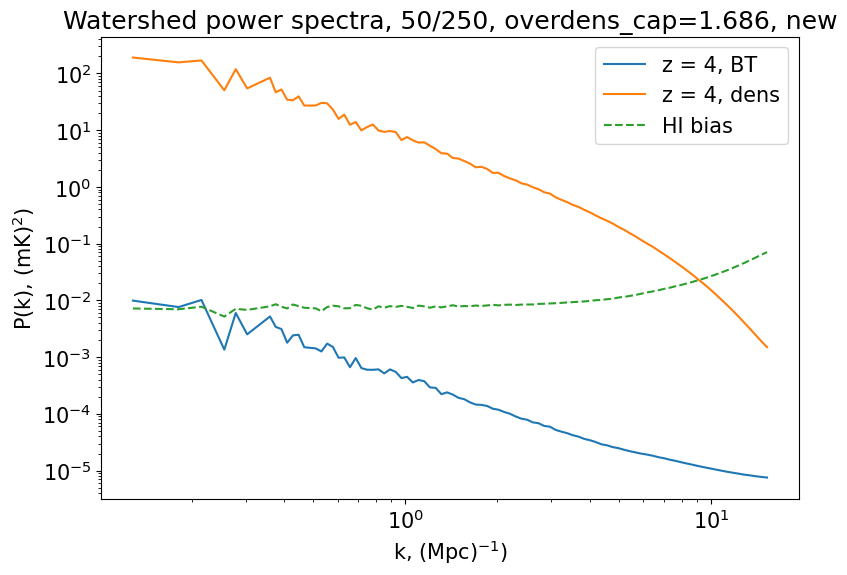

In [165]:
box.get_PS("BT", color="tab:blue")
box.get_PS("dens", color="tab:orange", title="Watershed power spectra, 50/250, overdens_cap=1.686, new")
k, bias = box.get_bias()
import matplotlib.pyplot as plt
plt.plot(k, bias, color="tab:green", linestyle="--", label="HI bias")
plt.legend()

<Figure size 900x600 with 0 Axes>

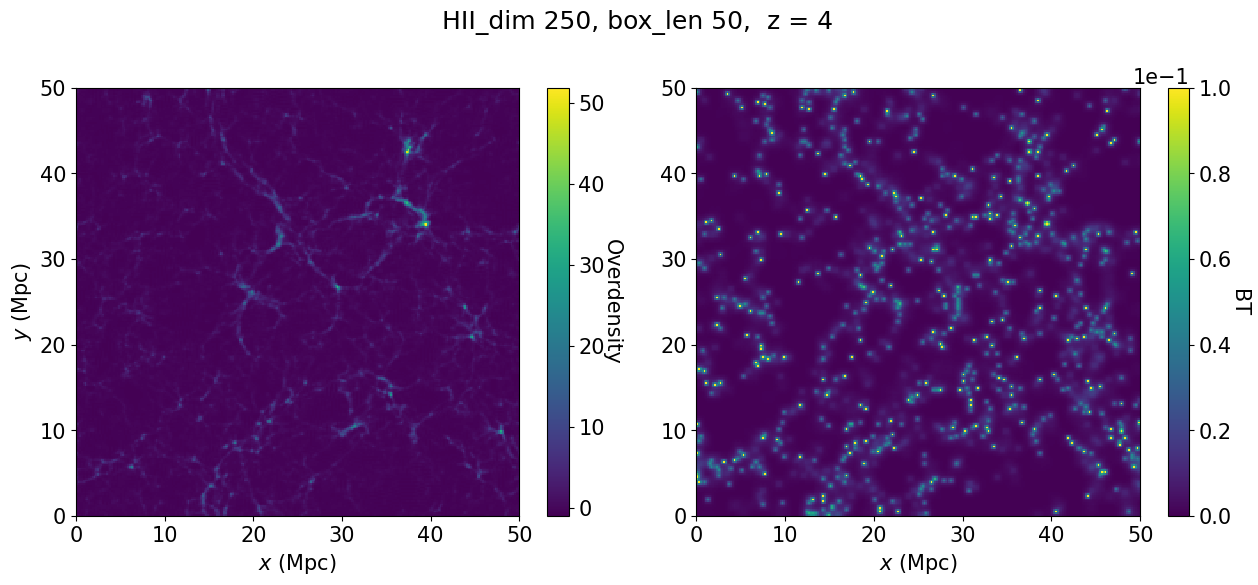

In [109]:
box.plot_slice(field="BT", vmax=1e-1)

In [2]:
import importlib
#importlib.reload(obs)
import postEoR.observations as obs

AAstar = obs.SKA1LOW_AAstar(5)

some_survey = obs.SingleDish(AAstar, 5, 4, 100, 10, 1)

a, b, c, d = some_survey.pk_gal(100000000, 1.5, box)

print(some_survey.fisher_pkshotnoise())

plt.plot(a, d)
plt.yscale("log")
plt.xscale("log")

NameError: name 'box' is not defined

In [192]:
import importlib
importlib.reload(obs)
import postEoR.observations as obs
import numpy as np

import matplotlib.pyplot as plt

AAstar = obs.SKA1LOW_AAstar(3)

some_survey2 = obs.Interferometer(AAstar, 4.1, 4, 100, 100, 0)

print(some_survey2.nvis)

print(some_survey2.aeffdish)

"""ps, k = some_survey2.noise_power_perp()

k = k[~np.isnan(ps)]
ps = ps[~np.isnan(ps)]

plt.plot(k, ps)"""

[4.59390643e-01 1.47323893e-01 1.38135158e-01 1.21814259e-01
 1.18169399e-01 1.06122468e-01 1.06566208e-01 9.12698472e-02
 8.57936889e-02 8.05172379e-02 7.14006407e-02 6.31722992e-02
 5.90807057e-02 5.11867707e-02 4.55162229e-02 4.01224856e-02
 3.59564640e-02 3.16266788e-02 2.68981402e-02 2.58271428e-02
 2.14213483e-02 1.82966649e-02 1.69857951e-02 1.45952220e-02
 1.31756668e-02 1.24475393e-02 9.77371401e-03 9.80539434e-03
 7.47739757e-03 7.19580869e-03 6.53381165e-03 5.65490968e-03
 5.44688273e-03 4.77876370e-03 4.28161127e-03 3.60023099e-03
 4.09813443e-03 3.14463010e-03 3.15092597e-03 2.94690950e-03
 2.93388213e-03 2.29854387e-03 2.24771333e-03 2.27390431e-03
 1.98980687e-03 2.01443814e-03 1.69759841e-03 1.72879954e-03
 1.32259856e-03 1.35173627e-03 1.10049096e-03 1.09388631e-03
 8.09725134e-04 8.82447200e-04 8.29474528e-04 8.46910929e-04
 8.31921355e-04 5.81834307e-04 8.07024363e-04 6.51729986e-04
 7.00368988e-04 6.11428378e-04 6.30400641e-04 5.41008977e-04
 6.95515463e-04 4.337328

/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)


'ps, k = some_survey2.noise_power_perp()\n\nk = k[~np.isnan(ps)]\nps = ps[~np.isnan(ps)]\n\nplt.plot(k, ps)'

<>:5: DeprecationWarning: invalid escape sequence '\l'
<>:5: DeprecationWarning: invalid escape sequence '\l'
/var/folders/9w/3vcm468n55x1vbp6mww734b00000gn/T/ipykernel_50771/600640511.py:5: DeprecationWarning: invalid escape sequence '\l'
  plt.xlabel("u, $\lambda$")


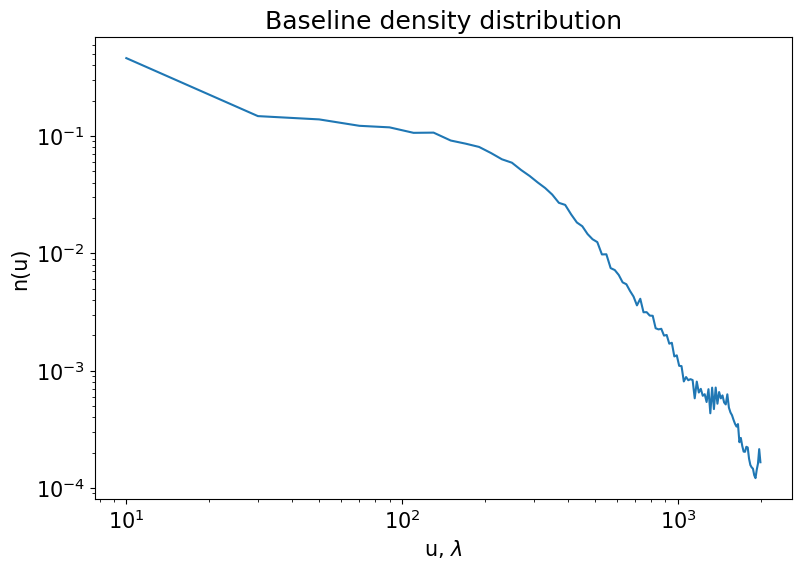

In [193]:
plt.plot(some_survey2.u, some_survey2.nvis)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("n(u)") 
plt.xlabel("u, $\lambda$")
plt.title("Baseline density distribution")
plt.show()

<>:9: DeprecationWarning: invalid escape sequence '\s'
<>:10: DeprecationWarning: invalid escape sequence '\l'
<>:9: DeprecationWarning: invalid escape sequence '\s'
<>:10: DeprecationWarning: invalid escape sequence '\l'
/var/folders/9w/3vcm468n55x1vbp6mww734b00000gn/T/ipykernel_50771/1439381654.py:9: DeprecationWarning: invalid escape sequence '\s'
  plt.ylabel("$\sigma_T$ per pointing, K")
/var/folders/9w/3vcm468n55x1vbp6mww734b00000gn/T/ipykernel_50771/1439381654.py:10: DeprecationWarning: invalid escape sequence '\l'
  plt.xlabel("u, $\lambda$")


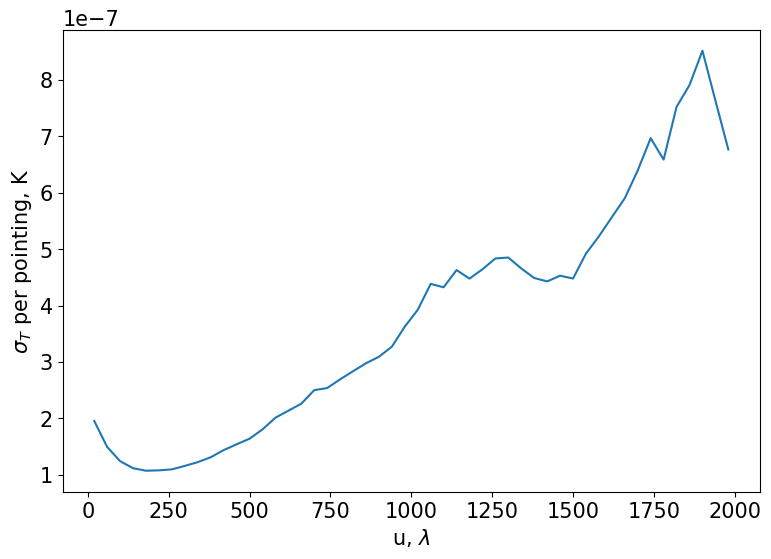

In [188]:
u_vals = some_survey2.u

sigma_T = some_survey2.sigmaT_per_pointing()

u_vals = u_vals[~np.isnan(sigma_T)]
sigma_T = sigma_T[~np.isnan(sigma_T)]

plt.plot(u_vals, sigma_T)
plt.ylabel("$\sigma_T$ per pointing, K")
plt.xlabel("u, $\lambda$")
plt.show()

<>:8: DeprecationWarning: invalid escape sequence '\p'
<>:8: DeprecationWarning: invalid escape sequence '\p'
/var/folders/9w/3vcm468n55x1vbp6mww734b00000gn/T/ipykernel_50771/2834756619.py:8: DeprecationWarning: invalid escape sequence '\p'
  plt.xlabel("k$_{\perp}$, h/Mpc")


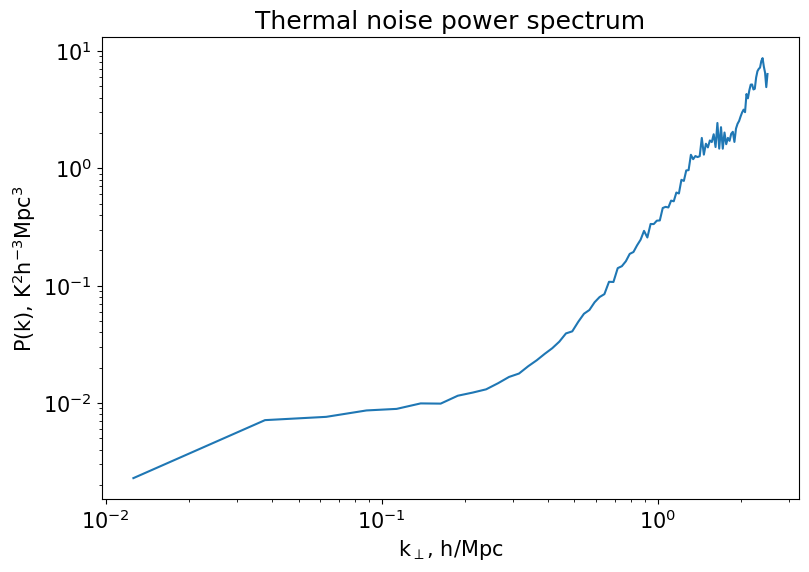

In [200]:
some_survey2.tint = 10
ps, k = some_survey2.noise_power_perp()

plt.plot(k, ps)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("P(k), K$^2$h$^{-3}$Mpc$^3$")
plt.xlabel("k$_{\perp}$, h/Mpc")
plt.title("Thermal noise power spectrum")
#plt.xlim(0.05, 0.3)
plt.show()